        Date   Gold_Price  Year  Month  Day
0 2010-01-01  1501.093428  2010      1    1
1 2010-01-02  1500.916900  2010      1    2
2 2010-01-03  1502.312277  2010      1    3
3 2010-01-04  1505.458336  2010      1    4
4 2010-01-05  1505.090030  2010      1    5

Missing Values:
 Date          0
Gold_Price    0
Year          0
Month         0
Day           0
dtype: int64


<ipython-input-12-41d5529350c5>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # [2]



Model Evaluation Results:

                                 MAE          MSE       RMSE        R2
Linear Regression          63.464253  4781.977914  69.151847  0.871384
Polynomial Regression      21.167506   726.378869  26.951417  0.980463
Ridge Regression           63.462326  4782.116700  69.152850  0.871380
Lasso Regression           63.376773  4785.439605  69.176872  0.871291
Support Vector Regression  44.357765  4159.875260  64.497095  0.888116
Decision Tree Regression    1.740706     5.226683   2.286194  0.999859
Random Forest Regression    1.494100     3.681187   1.918642  0.999901


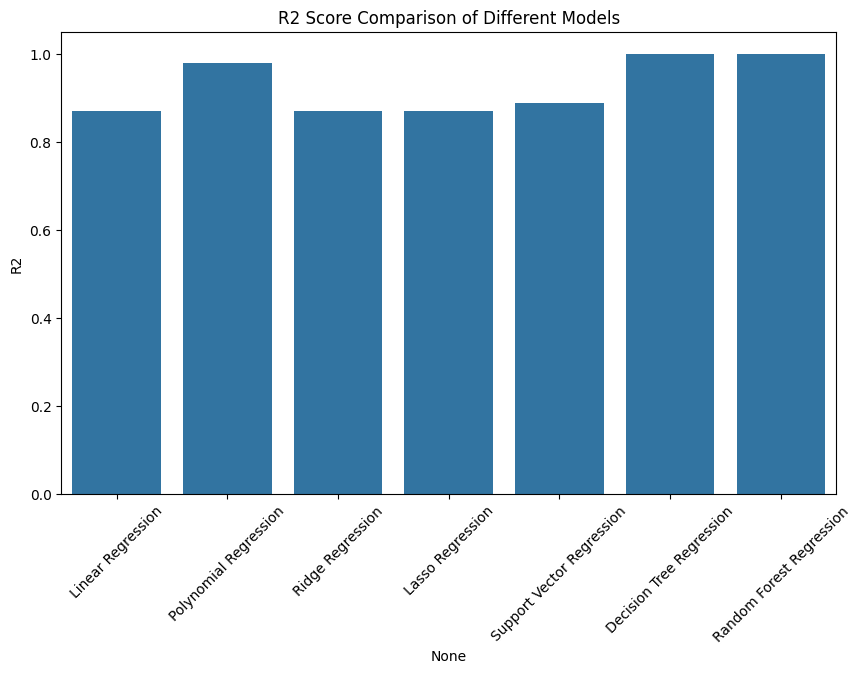

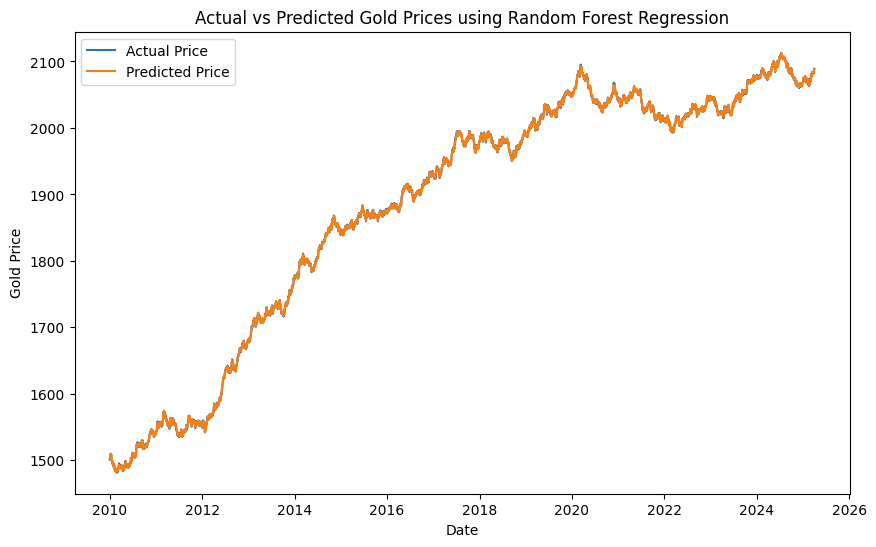

In [ ]:
# Gold Price Trend Prediction Assignment
# By: Thawatchai Duangmala
# Date: 30/03/25

# =======================
# 1. Importing Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===========================================
# 2. Loading and Preprocessing the Dataset
# ===========================================
# Load the dataset
# Replace with the path to your dataset
gold_price_data = '/content/sample_data/gold_price_data.csv'
df = pd.read_csv(gold_price_data)
df.head()
# Display first few rows of the dataset
#PLEASE write code...[1]...
print(data.head())

# Convert Date column to datetime type if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Sort the dataset by date
data = data.sort_values(by='Date')

# Feature Engineering (Creating time-related features)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Fill or drop missing values
# Alternatively, you can use data.fillna(method='ffill') or data.interpolate()
#PLEASE write code...[2]...
data = data.fillna(method='ffill')  # [2]


# Select relevant features
features = ['Year', 'Month', 'Day']
# You can add more features based on your dataset
#PLEASE write code...[3]...
features = ['Year', 'Month', 'Day']  # [3]
X = data[features]

# Replace 'Gold_Price' with the name of your target column
#PLEASE write code...[4]...
y = data['Gold_Price']

# ======================================
# 3. Data Splitting and Normalization
# ======================================
#PLEASE write code...[5]...(data split as 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================
# 4. Model Training
# ==========================
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': PolynomialFeatures(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

results = {}

for model_name, model in models.items():
    if model_name == 'Polynomial Regression':
        poly = PolynomialFeatures(degree=3)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = lin_reg.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = [mae, mse, rmse, r2]

# ==========================
# 5. Evaluation & Comparison
# ==========================
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R2']).T
print("\nModel Evaluation Results:\n")
print(results_df)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'])
plt.title('R2 Score Comparison of Different Models')
plt.xticks(rotation=45)
plt.show()

# ==========================
# 6. Prediction & Visualization
# ==========================
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

if best_model_name == 'Polynomial Regression':
    X_poly = poly.fit_transform(X)
    best_model.fit(X_poly, y)
    y_pred = best_model.predict(X_poly)
else:
    best_model.fit(X, y)
    y_pred = best_model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Price')
plt.plot(data['Date'], y_pred, label='Predicted Price')
plt.title(f'Actual vs Predicted Gold Prices using {best_model_name}')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

